In [1]:
# portfolio Project
import boto3
import pandas as pd
import io

In [2]:
# Initialize S3 client
s3 = boto3.client('s3')

# Specify the bucket name and file key
bucket_name = 'bihani-portfolio-project-1'
file_key = 'online_retail.csv'

# Get the object from S3
csv_obj = s3.get_object(Bucket=bucket_name, Key=file_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(io.StringIO(csv_string))

# Quick look at the DataFrame
print(df.head())

   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Perfroming EDA

In [3]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [4]:
print(df.isnull().sum())

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
df.shape

(541909, 9)

In [6]:
df.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Data cleaning and Pre Processiong 

In [8]:
# Convert data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('string')
df['Country'] = df['Country'].astype('category')

In [9]:
df.dtypes

index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country              category
dtype: object

In [10]:
# Handle Missing Values
# Filling missing descriptions with a placeholder
df['Description'] = df['Description'].fillna('No Description')

In [11]:
# Replace missing 'CustomerID' values with "Guest" 
# Convert CustomerID to string so that "Guest" is a valid entry
df['CustomerID'] = df['CustomerID'].fillna('Guest').astype(str) 

In [12]:
# Re-check missing values after replacement
print(df.isnull().sum())

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Feature Engineering 

In [13]:
# to analyze the time period, additional columns are created
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [14]:
# Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [15]:
# Create a transaction type column based on Qualtity
df['TransactionType'] = df['Quantity'].apply(lambda x: 'Return/Correction' if x < 0 else 'Sale')

In [16]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,DayOfWeek,Revenue,TransactionType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,15.30,Sale
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,22.00,Sale
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale


In [17]:
df.describe()

,index,Quantity,InvoiceDate,UnitPrice,Year,Month,Revenue
count,541909.00000,541909.000000,541909,541909.000000,541909.000000,541909.000000,541909.000000
mean,270954.00000,9.552250,2011-07-04 13:34:57.156386048,4.611114,2010.921609,7.553128,17.987795
min,0.00000,-80995.000000,2010-12-01 08:26:00,-11062.060000,2010.000000,1.000000,-168469.600000
25%,135477.00000,1.000000,2011-03-28 11:34:00,1.250000,2011.000000,5.000000,3.400000
50%,270954.00000,3.000000,2011-07-19 17:17:00,2.080000,2011.000000,8.000000,9.750000
75%,406431.00000,10.000000,2011-10-19 11:27:00,4.130000,2011.000000,11.000000,17.400000
max,541908.00000,80995.000000,2011-12-09 12:50:00,38970.000000,2011.000000,12.000000,168469.600000
std,156435.79785,218.081158,NaN,96.759853,0.268787,3.509055,378.810824


Descriptive Analysis

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
## 1- Product Analysis 

In [39]:
# Count the number of unique product descriptions
unique_descriptions = df['Description'].nunique()
print(f"Total Unique Descriptions: {unique_descriptions}")

Total Unique Descriptions: 4224


In [40]:
# Get frequency counts for each description
description_counts = df['Description'].value_counts()
print("Top 10 Most Frequent Product Descriptions:")
print(description_counts.head(10))

Top 10 Most Frequent Product Descriptions:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
No Description                        1454
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
Name: count, dtype: int64


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\907460707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_counts.head(10).values, y=description_counts.head(10).index, palette='viridis')


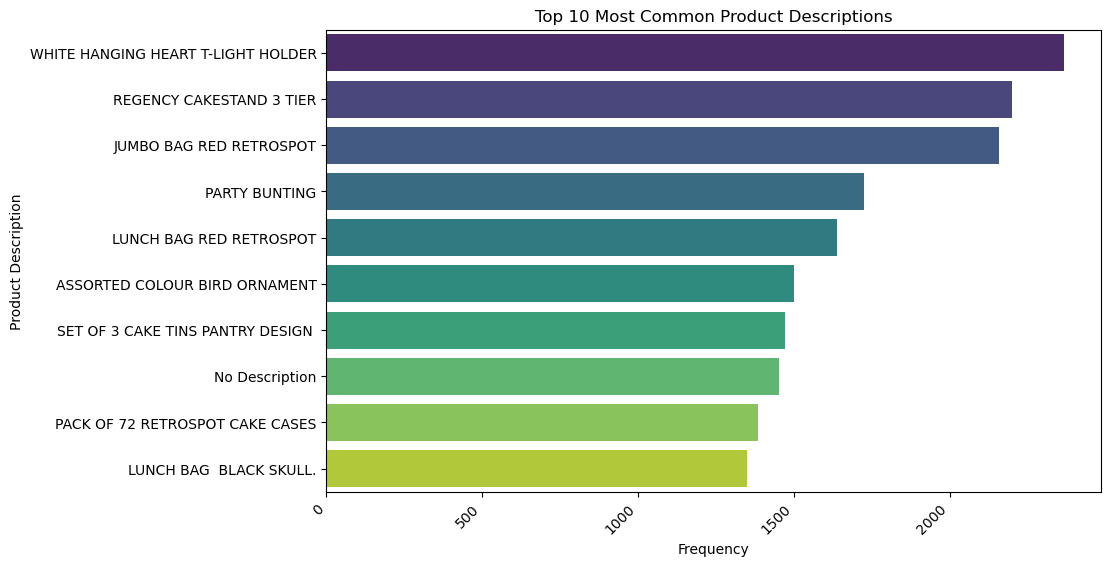

In [41]:
# Plot the frequency of the top 10 most common descriptions
plt.figure(figsize=(10, 6))
sns.barplot(x=description_counts.head(10).values, y=description_counts.head(10).index, palette='viridis')
plt.title("Top 10 Most Common Product Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# Performance Analysis by Product Description

# Aggregate net quantity and net revenue by product description.
# Here, both positive (sales) and negative (corrections/returns) quantities are taken into account.
description_summary = df.groupby('Description').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
top10_desc_revenue = description_summary.sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Product Descriptions by Net Revenue:\n", top10_desc_revenue)

Top 10 Product Descriptions by Net Revenue:
                              Description  Quantity    Revenue
1098                      DOTCOM POSTAGE       707  206245.48
2916            REGENCY CAKESTAND 3 TIER     13033  164762.19
3919  WHITE HANGING HEART T-LIGHT HOLDER     35317   99668.47
2472                       PARTY BUNTING     18022   98302.98
1866             JUMBO BAG RED RETROSPOT     47363   92356.03
2804                  RABBIT NIGHT LIGHT     30680   66756.59
2754                             POSTAGE      3003   66230.64
2440     PAPER CHAIN KIT 50'S CHRISTMAS      18902   63791.94
244        ASSORTED COLOUR BIRD ORNAMENT     36381   58959.73
773                        CHILLI LIGHTS     10229   53768.06


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\3395042330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_desc_revenue, x='Revenue', y='Description', palette='viridis')


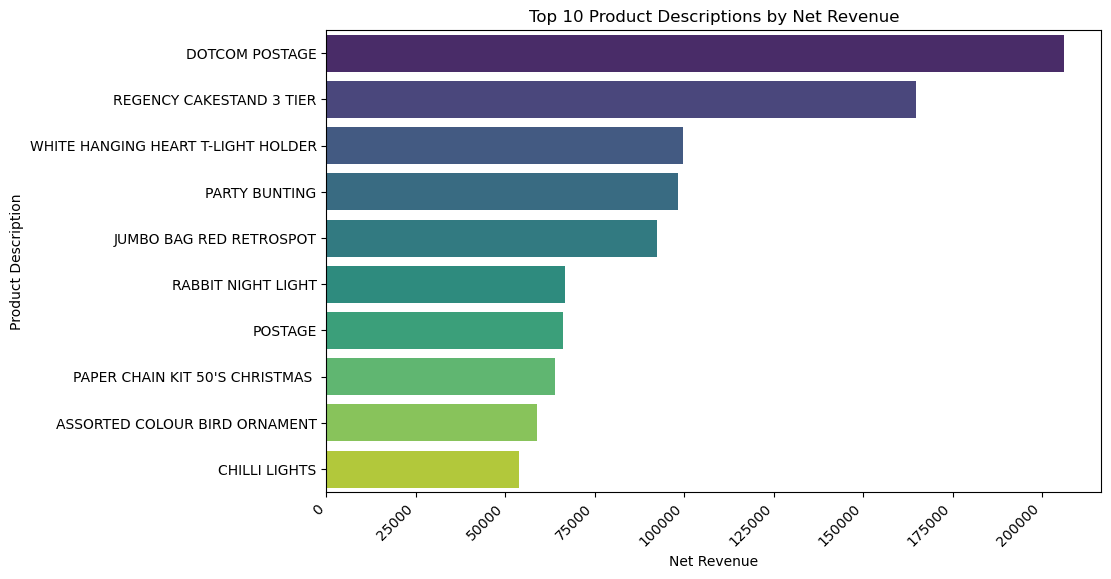

In [44]:
# Plot the Top 10 Product Descriptions by Net Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_desc_revenue, x='Revenue', y='Description', palette='viridis')
plt.title("Top 10 Product Descriptions by Net Revenue")
plt.xlabel("Net Revenue")
plt.ylabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
## Revenue Analysis 

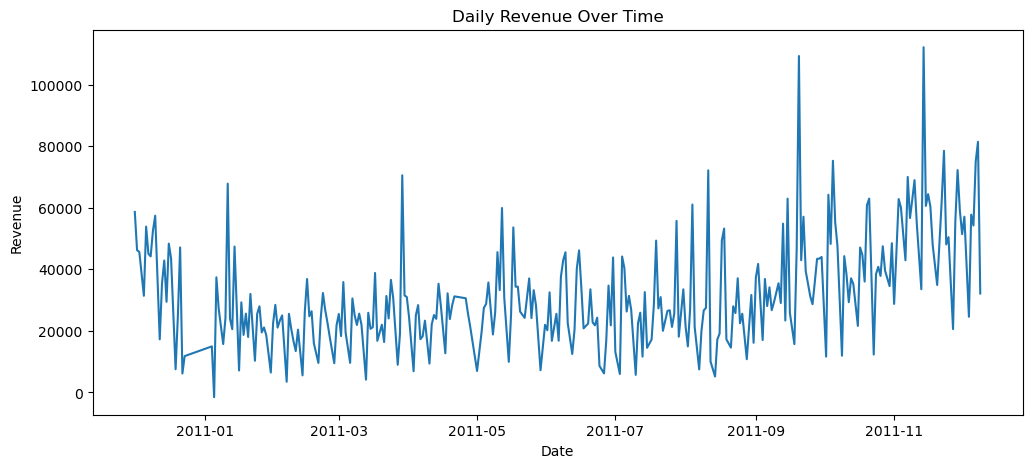

In [ ]:
# Time-Series Analysis: Daily Revenue
df['Date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('Date')['Revenue'].sum()
plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\1132310390.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))


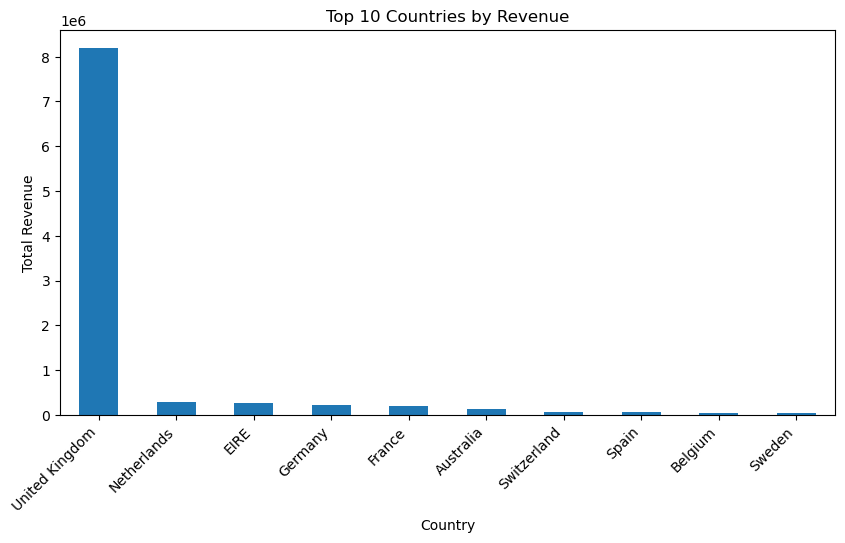

In [23]:
# Top 10 Countries by Revenue
top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Customers by Revenue:
      CustomerID     Revenue
4372      Guest  1447682.12
1703    14646.0   279489.02
4233    18102.0   256438.49
3758    17450.0   187482.17
1895    14911.0   132572.62
55      12415.0   123725.45
1345    14156.0   113384.14
3801    17511.0    88125.38
3202    16684.0    65892.08
1005    13694.0    62653.10


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\2562140639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_customers, x='Revenue', y='CustomerID', palette='coolwarm')


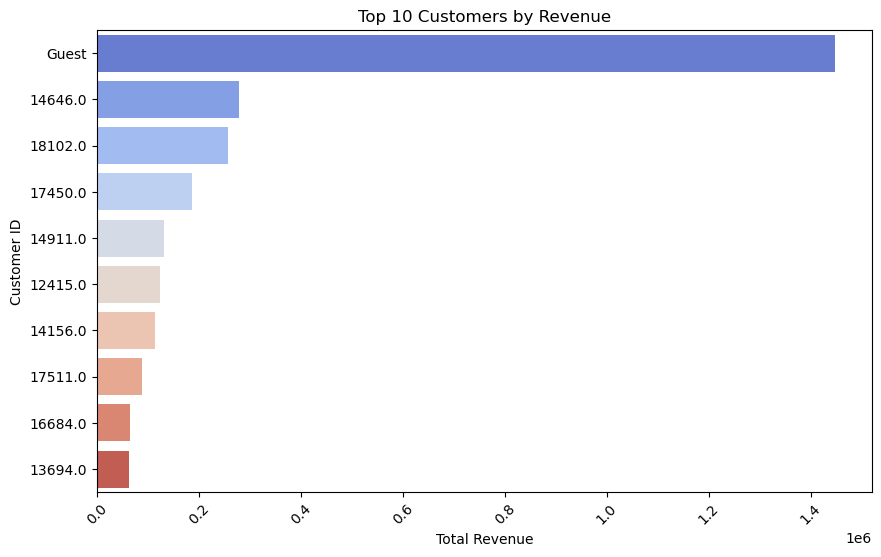

In [48]:
# Revenue by Customer
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
top10_customers = customer_revenue.sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top10_customers)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_customers, x='Revenue', y='CustomerID', palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

In [50]:
## 2- Customer Analysis 

In [51]:
# Total number of unique customers
unique_customers = df['CustomerID'].nunique()
print("Total Unique Customers:", unique_customers)

Total Unique Customers: 4373


In [52]:
# Distribution of unique customers by country
customer_by_country = df.groupby('Country')['CustomerID'].nunique().reset_index()
print("Top 10 Countries by Unique Customers:\n", customer_by_country.sort_values(by='CustomerID', ascending=False).head(10))

Top 10 Countries by Unique Customers:
            Country  CustomerID
36  United Kingdom        3951
14         Germany          95
13          France          88
31           Spain          31
3          Belgium          25
33     Switzerland          22
27        Portugal          20
19           Italy          15
12         Finland          12
1          Austria          11


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\2797438555.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_by_country = df.groupby('Country')['CustomerID'].nunique().reset_index()


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\2596240216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_by_country.sort_values(by='CustomerID', ascending=False).head(10),


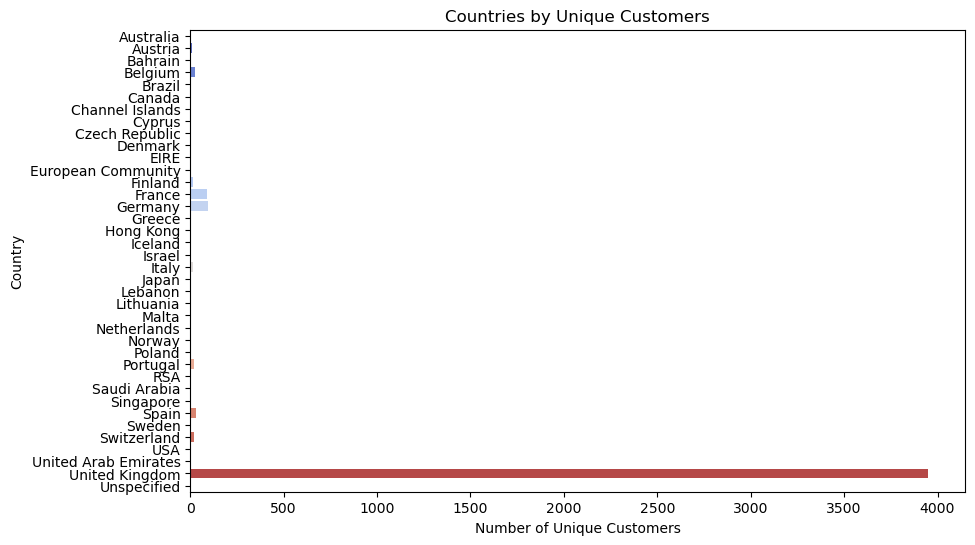

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_by_country.sort_values(by='CustomerID', ascending=False).head(10),
            x='CustomerID', y='Country', palette='coolwarm')
plt.title("Countries by Unique Customers")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Country")
plt.show()

In [55]:
# Determine new vs. returning customers:
# For each customer, first purchase date will be calculated.
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']

# Merge back to the main DataFrame so each transaction has the customer's first purchase date
df = df.merge(first_purchase, on='CustomerID', how='left')

# Flag transactions as "New" if the InvoiceDate equals the FirstPurchaseDate; otherwise, "Returning"
df['CustomerType'] = df.apply(
    lambda row: 'New' if row['InvoiceDate'].date() == row['FirstPurchaseDate'].date() else 'Returning', axis=1)

df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,DayOfWeek,Revenue,TransactionType,Date,FirstPurchaseDate,CustomerType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,15.30,Sale,2010-12-01,2010-12-01 08:26:00,New
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale,2010-12-01,2010-12-01 08:26:00,New
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,22.00,Sale,2010-12-01,2010-12-01 08:26:00,New
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale,2010-12-01,2010-12-01 08:26:00,New
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale,2010-12-01,2010-12-01 08:26:00,New
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,Wednesday,15.30,Sale,2010-12-01,2010-12-01 08:26:00,New
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,Wednesday,25.50,Sale,2010-12-01,2010-12-01 08:26:00,New
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,Wednesday,11.10,Sale,2010-12-01,2010-12-01 08:26:00,New
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,Wednesday,11.10,Sale,2010-12-01,2010-12-01 08:26:00,New
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,Wednesday,54.08,Sale,2010-12-01,2010-12-01 08:34:00,New


In [59]:
# counts by Customer Type
customer_type_counts = df['CustomerType'].value_counts()
print("Customer Type Counts:\n", customer_type_counts)


Customer Type Counts:
 CustomerType
Returning    435236
New          106673
Name: count, dtype: int64


In [60]:
## revenue by Customer Type
revenue_by_customer_type = df.groupby('CustomerType')['Revenue'].sum()
print("Revenue by Customer Type:\n", revenue_by_customer_type)

Revenue by Customer Type:
 CustomerType
New          1799902.363
Returning    7947845.571
Name: Revenue, dtype: float64


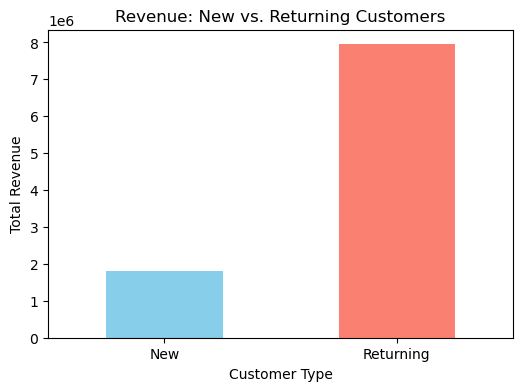

In [58]:
plt.figure(figsize=(6, 4))
revenue_by_customer_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Revenue: New vs. Returning Customers")
plt.xlabel("Customer Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

In [62]:
# Compare Average Revenue per Transaction for New vs. Returning Customers
customer_revenue = df.groupby('CustomerType')['Revenue'].agg(['mean', 'sum', 'count']).reset_index()
print("Revenue Statistics by Customer Type:")
print(customer_revenue)

Revenue Statistics by Customer Type:
  CustomerType       mean          sum   count
0          New  16.873083  1799902.363  106673
1    Returning  18.261002  7947845.571  435236


C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\396477113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerType', y='mean', data=customer_revenue, palette='pastel')


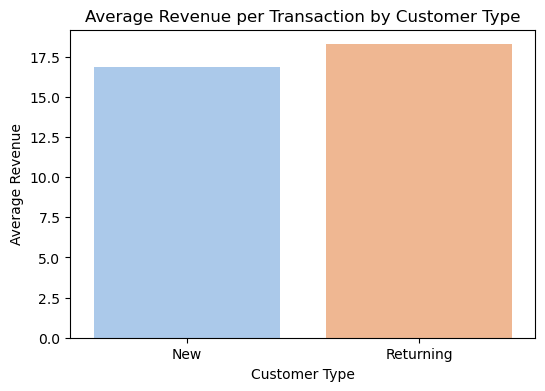

In [63]:
plt.figure(figsize=(6, 4))
sns.barplot(x='CustomerType', y='mean', data=customer_revenue, palette='pastel')
plt.title("Average Revenue per Transaction by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Revenue")
plt.show()

In [67]:
# Pivot Table: Monthly Revenue by Country
pivot_time_country = df.pivot_table(index='Year', columns='Country', values='Revenue', aggfunc='sum')
print("Yearly Revenue by Country:")
print(pivot_time_country)

Yearly Revenue by Country:
Country  Australia  Austria  Bahrain   Belgium  Brazil   Canada  \
Year                                                              
2010       1005.10   257.04   205.74   1809.91     0.0     0.00   
2011     136072.17  9897.28   342.66  39101.05  1143.6  3666.38   

Country  Channel Islands    Cyprus  Czech Republic   Denmark  ...      RSA  \
Year                                                          ...            
2010              363.53   1590.82            0.00   1281.50  ...     0.00   
2011            19722.76  11355.47          707.72  17486.64  ...  1002.31   

Country  Saudi Arabia  Singapore     Spain    Sweden  Switzerland      USA  \
Year                                                                         
2010             0.00       0.00   1843.73   2646.30      1304.92     0.00   
2011           131.17    9120.39  52930.85  33949.61     55080.43  1730.92   

Country  United Arab Emirates  United Kingdom  Unspecified  
Year             

C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\1632752565.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_time_country = df.pivot_table(index='Year', columns='Country', values='Revenue', aggfunc='sum')


In [70]:
# Pivot Table: Revenue by Customer Type and Country
# (Assuming 'CustomerType' is already defined in your DataFrame)
pivot_customer = df.pivot_table(index='Country', columns='CustomerType', values='Revenue', aggfunc='sum')
print("Revenue by Customer Type and Country:")
print(pivot_customer)

Revenue by Customer Type and Country:
CustomerType                  New    Returning
Country                                       
Australia               10581.790   126495.480
Austria                  5224.780     4929.540
Bahrain                   548.400        0.000
Belgium                 11264.350    29646.610
Brazil                   1143.600        0.000
Canada                   1897.800     1768.580
Channel Islands          8817.710    11268.580
Cyprus                   5359.240     7587.050
Czech Republic            549.260      158.460
Denmark                  8587.210    10180.930
EIRE                     1301.620   261975.200
European Community        191.400     1100.350
Finland                 11320.330    11006.410
France                  43177.620   154226.280
Germany                 52711.960   168986.250
Greece                   4339.280      371.240
Hong Kong                   0.000    10117.040
Iceland                   711.790     3598.210
Israel                

C:\Users\Bihani\AppData\Local\Temp\ipykernel_9968\3130182584.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_customer = df.pivot_table(index='Country', columns='CustomerType', values='Revenue', aggfunc='sum')


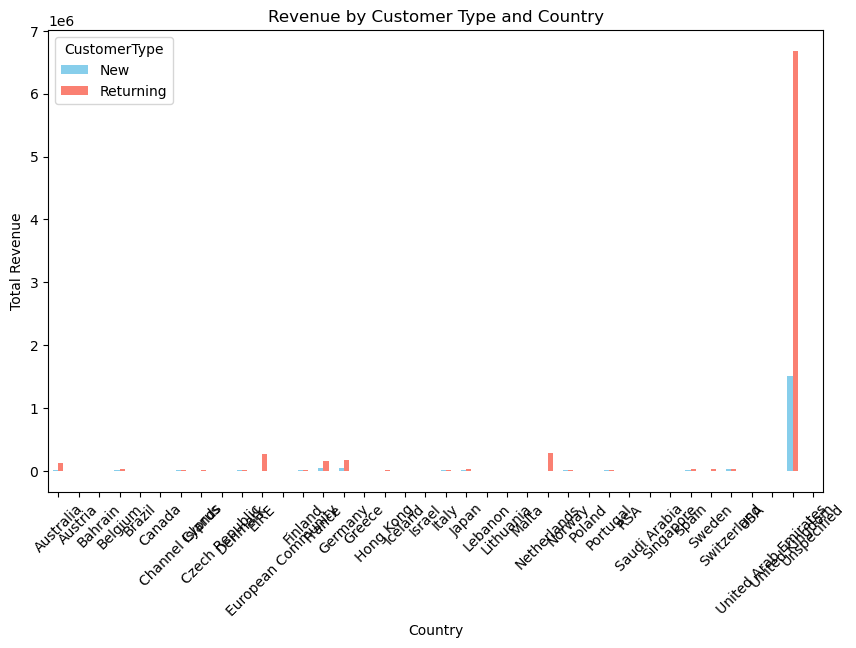

In [71]:
# Visualize with a bar plot
pivot_customer.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Revenue by Customer Type and Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()